<a href="https://colab.research.google.com/github/emmab-collab/portfolio/blob/main/Digestive_Biopsy_Classification_w_PyTorch_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00:00:0100:01
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1902513897b6ce3c248d0c69d8960eb71cc91a91276da3ba3ae6fdfa7e79ac33
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

from medmnist import INFO, PathMNIST

# **1. Preparing the data**

In [ ]:
from torchvision.transforms import ToTensor, Normalize, Compose

In [ ]:
transform = Compose([
    ToTensor(),
    Normalize((0.5,), (0.5,))  # normalise en centrant autour de 0, en divisant par 0.5 (par exemple)
])

train_dataset = PathMNIST(split='train', download=True, transform=transform)
val_dataset = PathMNIST(split='val', download=True, transform=transform)
test_dataset = PathMNIST(split='test', download=True, transform=transform)

In [ ]:
img,label=train_dataset[0]
img.shape,label

(torch.Size([3, 28, 28]), array([0]))

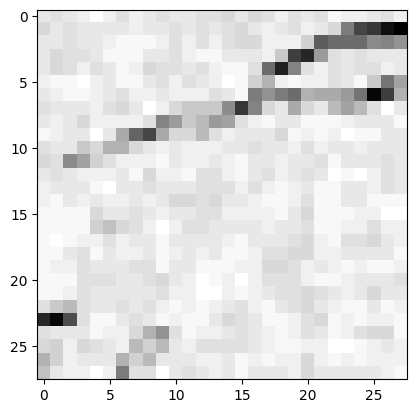

In [ ]:
plt.imshow(img[0],cmap='gray')

In [ ]:
img[0,10:15,10:15]

tensor([[0.7255, 0.7333, 0.7333, 0.7333, 0.7255],
        [0.7255, 0.7333, 0.7333, 0.7255, 0.7333],
        [0.7333, 0.7412, 0.7176, 0.7176, 0.7333],
        [0.7255, 0.7255, 0.7176, 0.7176, 0.7176],
        [0.7098, 0.7098, 0.7176, 0.7098, 0.7255]])

In [ ]:
batch_size=100


train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
data_flag = 'pathmnist'
info = INFO[data_flag]
labels = info['label']
print(f"Les labels: \n{labels}\n")
num_classes = len(labels)
print(f"Nombre de classes : {num_classes}")

Les labels: 
{'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}

Nombre de classes : 9


In [ ]:
print(f"Taille du dataset train : {len(train_dataset)}")
print(f"Taille du dataset val : {len(val_dataset)}")
print(f"Taille du dataset test : {len(test_dataset)}")

Taille du dataset train : 89996
Taille du dataset val : 10004
Taille du dataset test : 7180


# **2. Model**

## **1. Création du modèle**

In [ ]:
import torch.nn as nn #neural_network_package
import torch.nn.functional as F #softmax, cross_entropy

In [ ]:
for xb,yb in train_dl:
    xb=xb.reshape(xb.size(0),-1)
    print(xb.shape)
    break

torch.Size([100, 2352])


In [ ]:
class PathMnistModel(nn.Module): #une classe de modèle
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__() #superconstructeur de la classe mère
        self.linear1=nn.Linear(in_size,hidden_size)
        self.linear2=nn.Linear(hidden_size,out_size)

    def forward(self,xb):
        xb=xb.reshape(xb.size(0),-1) #xb est un batch of input
        out=self.linear1(xb)
        out=F.relu(out)
        out=self.linear2(out)
        return out

In [ ]:
input_size=2352 #28*28*3=2352
num_classes = 9
model=PathMnistModel(input_size,hidden_size=256,out_size=num_classes) #on crée un modèle de la classe MnistModel

In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([256, 2352])
torch.Size([256])
torch.Size([9, 256])
torch.Size([9])


In [ ]:
for images,labels in train_dl:
    print('images.shape: ', images.shape)
    outputs=model(images)
    loss=F.cross_entropy(outputs,labels.squeeze())
    print('Loss:',loss.item())
    break
print('outputs.shape: ',outputs.shape)
print('Sample outputs :\n',outputs[:2].data)

images.shape:  torch.Size([100, 3, 28, 28])
Loss: 2.209897518157959
outputs.shape:  torch.Size([100, 9])
Sample outputs :
 tensor([[ 0.0046, -0.3310,  0.0511, -0.0203,  0.1140, -0.1316,  0.0456, -0.1283,
          0.1462],
        [-0.0224, -0.1429,  0.0578, -0.0115,  0.0258,  0.0092,  0.0695, -0.1662,
          0.1055]])


## **2. Using a GPU**

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def to_device(data,device):
    if isinstance(data,(list,tuple)): #si notre dataset est une liste ou tuple
        return [to_device(x,device)for x in data]
    return data.to(device,non_blocking=True)

In [ ]:
for images, labels in train_dl:
    print(images.shape)
    images=to_device(images,device)
    print(images.device)
    break

torch.Size([100, 3, 28, 28])
cuda:0


In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b,self.device) #ca genere le batch sans repetition

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)

In [ ]:
for xb,yb in val_dl:
    print('xb device: ',xb.device)
    print('yb',yb.reshape(-1))
    break

xb device:  cuda:0
yb tensor([5, 0, 1, 7, 1, 4, 3, 8, 6, 7, 3, 7, 2, 2, 5, 5, 7, 5, 4, 8, 6, 4, 4, 3,
        5, 6, 6, 6, 0, 3, 0, 2, 1, 8, 4, 1, 3, 4, 2, 1, 1, 8, 4, 3, 7, 2, 6, 0,
        2, 0, 3, 6, 8, 4, 8, 8, 2, 5, 3, 4, 1, 7, 3, 8, 6, 2, 8, 8, 6, 8, 5, 4,
        5, 1, 6, 8, 8, 6, 4, 8, 1, 3, 2, 3, 6, 2, 3, 8, 2, 3, 0, 8, 8, 5, 8, 1,
        2, 1, 8, 8], device='cuda:0')


# **3. Defining the model functions**

## **1. Loss batch function**

In [ ]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    #Calculate loss
    preds=model(xb)
    yb=yb.reshape(-1)
    loss=loss_func(preds,yb)

    if opt is not None:
        #Compute gradients
        loss.backward()
        #Update parameters
        opt.step()
        #Reset gradients
        opt.zero_grad()

    metric_result=None
    if metric is not None:
        #Compute the metric
        metric_result=metric(preds,yb)

    return loss.item(),len(xb),metric_result

## **2. Evaluate fonction**

In [ ]:
def evaluate(model,loss_fn,val_dl,metric=None):
    with torch.no_grad():
        results=[loss_batch(model,loss_fn,xb,yb.reshape(-1),metric=metric)
                for xb,yb in val_dl]
        losses,nums,metrics=zip(*results)
        total=np.sum(nums)
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            avg_metric=np.sum(np.multiply(metrics,nums))/total

    return avg_loss,total,avg_metric

## **3. Fit function**

In [ ]:
def fit(epochs,lr,model,loss_fn,train_dl,val_dl,metric=None,opt_fn=None):
    losses,metrics=[],[]

    if opt_fn is None: opt_fn=torch.optim.SGD
    opt = opt_fn(model.parameters(), lr=lr)


    for epoch in range(epochs):
        #Train
        for xb,yb in train_dl:
            yb=yb.reshape(-1)
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)

        #Evaluate
        result=evaluate(model,loss_fn,val_dl,metric)
        val_loss,total,val_metric=result

        #Record Loss and metric
        losses.append(val_loss)
        metrics.append(val_metric)

        if metric is None:
            print(f'Epoch [{epoch+1}/{epochs}, Loss: {val_loss:.4f}')
        else:

            print(f'Epoch [{epoch+1}/{epochs}, Loss: {val_loss:.4f}, {metric.__name__} : {val_metric}')

    return losses,metrics

## **4. Accuracy function**

In [ ]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1) #on prend juste l'index du max
    return torch.sum(preds==labels).item()/len(preds)

In [ ]:
for xb,yb in train_dl:
    output=model(xb)
    print(output.shape)
    #print(output)
    print(yb.shape)
    print(torch.max(output, dim=1))
    break

torch.Size([100, 9])
torch.Size([100, 1])
torch.return_types.max(
values=tensor([0.2229, 0.1908, 0.2015, 0.2050, 0.1437, 0.1720, 0.1513, 0.2053, 0.2173,
        0.1538, 0.1970, 0.2577, 0.2122, 0.1264, 0.2612, 0.2404, 0.2219, 0.1486,
        0.0854, 0.2012, 0.2228, 0.2316, 0.2164, 0.0939, 0.1675, 0.3071, 0.1639,
        0.2252, 0.2629, 0.1985, 0.3092, 0.1943, 0.2030, 0.2773, 0.2648, 0.3126,
        0.2750, 0.2496, 0.0926, 0.1728, 0.1409, 0.1081, 0.1708, 0.2389, 0.1852,
        0.2725, 0.1757, 0.1992, 0.2469, 0.1604, 0.3534, 0.2175, 0.2929, 0.2123,
        0.2109, 0.2588, 0.1672, 0.3141, 0.2700, 0.1655, 0.2069, 0.1459, 0.2437,
        0.2350, 0.1756, 0.1967, 0.2786, 0.2110, 0.1660, 0.1250, 0.1752, 0.0764,
        0.2300, 0.2243, 0.1840, 0.1156, 0.2161, 0.1457, 0.2134, 0.1789, 0.2531,
        0.1967, 0.2046, 0.1507, 0.1924, 0.2629, 0.1563, 0.1689, 0.2403, 0.1933,
        0.1672, 0.2411, 0.2283, 0.1884, 0.2381, 0.1548, 0.2244, 0.2179, 0.2210,
        0.1206], device='cuda:0', grad_fn=<MaxB

# **4. Training the model**

In [ ]:
model=PathMnistModel(input_size,hidden_size=256,out_size=num_classes)
to_device(model,device)

PathMnistModel(
  (linear1): Linear(in_features=2352, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=9, bias=True)
)

In [ ]:
val_loss,total,val_acc=evaluate(model,F.cross_entropy,val_dl,metric=accuracy)
print(f'Loss : {val_loss:.4f}, Accuracy : {val_acc:.4f}')

Loss : 2.1972, Accuracy : 0.1054


In [ ]:
lr = 0.01
epochs = 5
losses1,metrics1=fit(epochs,lr,model,F.cross_entropy,train_dl,val_dl,accuracy)

Epoch [1/5, Loss: 1.8278, accuracy : 0.2928828468612555
Epoch [2/5, Loss: 1.7695, accuracy : 0.3179728108756497
Epoch [3/5, Loss: 1.7241, accuracy : 0.36075569772091165
Epoch [4/5, Loss: 1.6788, accuracy : 0.3392642942822871
Epoch [5/5, Loss: 1.6387, accuracy : 0.3872451019592163


In [ ]:
losses2,metrics2=fit(5,0.001,model,F.cross_entropy,train_dl,val_dl,accuracy)

Epoch [1/5, Loss: 1.6349, accuracy : 0.3829468212714914
Epoch [2/5, Loss: 1.6323, accuracy : 0.3909436225509796
Epoch [3/5, Loss: 1.6298, accuracy : 0.390843662534986
Epoch [4/5, Loss: 1.6276, accuracy : 0.3799480207916833
Epoch [5/5, Loss: 1.6254, accuracy : 0.4022391043582567


In [ ]:
losses3,metrics3=fit(5,0.001,model,F.cross_entropy,train_dl,val_dl,accuracy)

Epoch [1/5, Loss: 1.6229, accuracy : 0.39344262295081966
Epoch [2/5, Loss: 1.6207, accuracy : 0.4057377049180328
Epoch [3/5, Loss: 1.6183, accuracy : 0.3905437824870052
Epoch [4/5, Loss: 1.6096, accuracy : 0.40453818472610953
Epoch [5/5, Loss: 1.5934, accuracy : 0.4068372650939624


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

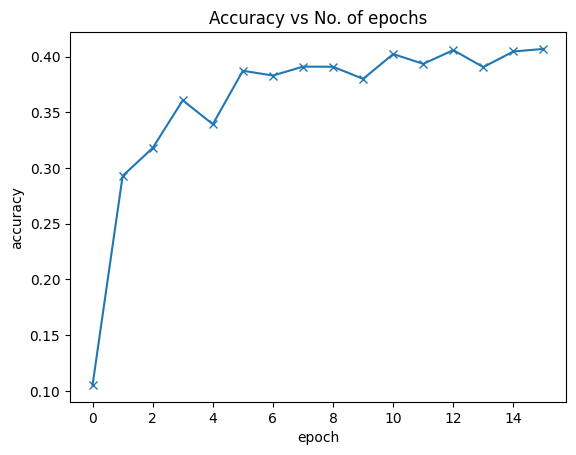

In [ ]:
accuracies=[val_acc]+metrics1+metrics2+metrics3
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

# **5. Conclusion**

Avec un ``DNN (Deep Neural Network)`` on ne peut atteindre plus de ``40% - 50% d'accuracy`` sur des images médicales complexes de PathMNIST.

Pour dépasser ``70%-80% d'accuracy`` il faut passer par un ``CNN (convolutional neural network)`` même simple.